### Topology of a Neural Network

[1. Importing libraries](#1.-Importing-libraries) <br>
[2. Activation functions](#2.-Activation-functions) <br>
[3. Creating neural network](#3.-Creating-neural-network)<br>
&emsp;&emsp;[3.1. Train-test data preparation](#3.1.-Train-test-data-preparation)<br>
&emsp;&emsp;[3.2. Data normalization](#3.2.-Data-normalization)<br>
&emsp;&emsp;[3.3. Flattening data](#3.3.-Flattening-data)<br>
&emsp;&emsp;[3.4. Neural network architecture preparation](#3.4.-Neural-network-architecture-preparation)<br>
&emsp;&emsp;[3.5. Optimizer, loss function and metrics](#3.5.-Optimizer,-loss-function-and-metrics)<br>
&emsp;&emsp;[3.6. Training the neural network](#3.6.-Training-the-neural-network)<br>

[Task 1](#Task-1) <br>
[Task 2](#Task-2) <br>
[Task 3](#Task-3) <br>
[Task 4](#Task-4) <br>
[Task 5](#Task-5) <br>

#### 1. Importing  libraries

In [3]:
!pip install mnist

import numpy as np
import math
import mnist

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### 2. Activation functions

Below are new variables that will refer to the output values ​​of a certain neural network.

In [ ]:
x = np.array([1.3, 0.32, 0.21])
y = 2
a = -9
z = 4

Create simple implementations of 
- a `softmax` function with the `x` argument; 
- a `sigmoid` function with the `y` argument;
- a `relu` function with the `a` argument;
- a `tanh` function with the `z` argument;

In [ ]:
def softmax(x):
    return np.exp(x) / sum(np.exp(x))

def sigmoid(y):
    return 1 / (1 + np.exp(-y))

def relu(a):
    return max(0,a)

def tanh(z):
    return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

print(softmax(x))
print(sigmoid(y))
print(relu(a))
print(tanh(z))

[0.58427337 0.21928428 0.19644234]
0.8807970779778823
0
0.9993292997390669



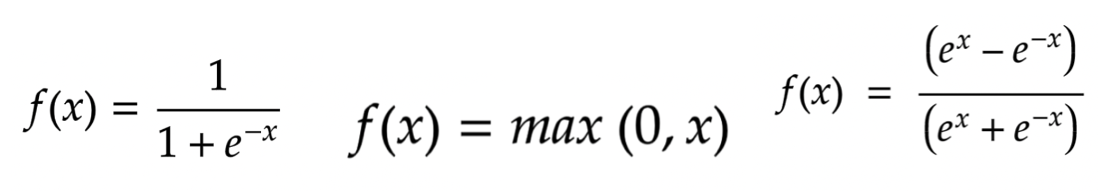

#### 3. Creating neural network

##### 3.1. Train-test data preparation

In [4]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

print(train_images.shape)
print(train_labels.shape)
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)
(60000, 28, 28)
(60000,)


##### 3.2. Data normalization

In [5]:
train_images = (train_images / 255) - 0.5 #255, because RGB
test_images = (test_images / 255) - 0.5

print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


##### 3.3. Flattening data

In [6]:
train_images = train_images.reshape((-1, 784)) #28*28 (images shape 28x28) = 784
test_images = test_images.reshape((-1, 784))

print(train_images.shape)

(60000, 784)


##### 3.4. Neural network architecture preparation

In [7]:
from keras.layers import Dropout

model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dropout(0.2, input_shape=(784,)),
    #10 digits => więc 10 neurons in the output layer
    Dense(10, activation='softmax'), #more than 2 classes, so softmax (if there were 2, sigmoid)
])

##### 3.5. Optimizer, loss function and metrics

In [8]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

##### 3.6. Training the neural network

In [9]:
model.fit(
    train_images,
    to_categorical(train_labels),
    epochs = 5, #theoretically, the more times the network sees the data, the better, BUT watch out for overtraining
    batch_size = 30,
)

Epoch 1/5
2000/2000 [==============================] - 5s 2ms/step - loss: 0.4155 - accuracy: 0.8723
Epoch 2/5
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2138 - accuracy: 0.9353
Epoch 3/5
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1704 - accuracy: 0.9489
Epoch 4/5
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1477 - accuracy: 0.9550
Epoch 5/5
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1302 - accuracy: 0.9596


#### Task 1
Look for information on the possibility of generating a graphic presenting the architecture of the neural network and insert it below (with the code used).

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


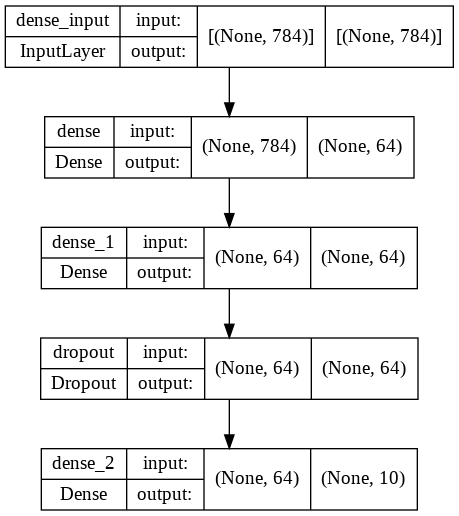

In [10]:
!pip install pydot
!pip install graphviz
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#### Task 2
Reload the `model` model, modify the parameters relating to the neural network training process. Raise the number of `epochs` to 100. After what time the **accuracy** becomes stable or its value drops? How does the **validation loss** value behave?

In [11]:
model_v2 = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dropout(0.2, input_shape=(784,)),
    Dense(10, activation='softmax'),
])

model_v2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

model_v2.fit(
    train_images,
    to_categorical(train_labels),
    epochs=100,
    batch_size=30,
)

Epoch 1/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.4425 - accuracy: 0.8649
Epoch 2/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2350 - accuracy: 0.9296
Epoch 3/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1878 - accuracy: 0.9439
Epoch 4/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1601 - accuracy: 0.9527
Epoch 5/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1462 - accuracy: 0.9553
Epoch 6/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1351 - accuracy: 0.9585
Epoch 7/100
2000/2000 [==============================] - 5s 2ms/step - loss: 0.1232 - accuracy: 0.9627
Epoch 8/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1209 - accuracy: 0.9635
Epoch 9/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1116 - accuracy: 0.9652
Epoch 10/100
2000/2000 [==============================] - 4s 2ms/step - l

- **classification accuracy**: to epoch 19 it is increasing, then it starts to fluctuate (sometimes better, sometimes weaker accuracy of `step i` in relation to` step i-1`) with a simultaneous general increasing tendency, but with a slight improvement in this accuracy. <br>
- **validation loss**: decreasing tendency

#### Task 3
Reload the `model` model, modify the parameters relating to the neural network training process. Leave the epoch count, but modify the `batch size` value to 20. Did it affect to the end parameters of the model or was it unrelated?

In [12]:
model_v3 = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dropout(0.2, input_shape=(784,)),
    Dense(10, activation='softmax'),
])

model_v3.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

model_v3.fit(
    train_images,
    to_categorical(train_labels),
    epochs=5,
    batch_size=20,
)

Epoch 1/5
3000/3000 [==============================] - 6s 2ms/step - loss: 0.4196 - accuracy: 0.8716
Epoch 2/5
3000/3000 [==============================] - 6s 2ms/step - loss: 0.2278 - accuracy: 0.9307
Epoch 3/5
3000/3000 [==============================] - 6s 2ms/step - loss: 0.1867 - accuracy: 0.9444
Epoch 4/5
3000/3000 [==============================] - 6s 2ms/step - loss: 0.1640 - accuracy: 0.9506
Epoch 5/5
3000/3000 [==============================] - 6s 2ms/step - loss: 0.1491 - accuracy: 0.9541


- `model`:
    - loss: 0.1302
    - accuracy: 0.9596
- `model_v3`:
    - loss: 0.1491
    - accuracy: 0.9541

Changing the `batch_size` from 30 to 20 decreased the `accuracy` and increased the `validation loss`.

#### Task 4
Suggest a different neural network architecture. Change the number of **layers**, modify the number of **nodes**. Add a new `Dropout` layer type (see more here - https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/). Did you manage to achieve better model parameters?

In [13]:
model_v4 = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dropout(0.2, input_shape=(784,)),
    Dense(10, activation='softmax'),
])

model_v4.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

model_v4.fit(
    train_images,
    to_categorical(train_labels),
    epochs=5,
    batch_size=15,
)

Epoch 1/5
4000/4000 [==============================] - 10s 2ms/step - loss: 0.3677 - accuracy: 0.8874
Epoch 2/5
4000/4000 [==============================] - 8s 2ms/step - loss: 0.1891 - accuracy: 0.9429
Epoch 3/5
4000/4000 [==============================] - 8s 2ms/step - loss: 0.1522 - accuracy: 0.9546
Epoch 4/5
4000/4000 [==============================] - 8s 2ms/step - loss: 0.1314 - accuracy: 0.9607
Epoch 5/5
4000/4000 [==============================] - 9s 2ms/step - loss: 0.1167 - accuracy: 0.9643


In [14]:
print(model_v4.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
None


#### Task 5
Recreate the two neural network architectures `model_x` and `model_y` listed below. Define the activation function as linear (also for the output) and train with 10 epochs. How would you describe the learning process? Why do neural networks behave similarly during training despite their differences? And why their parameters (`classification accuracy`, `val loss`) are the same regardless of the epoch?

**model_x**

In [ ]:
model_x = Sequential([
    Dense(256, activation='linear', input_shape=(784,)),
    Dense(256, activation='linear'),
    Dense(256, activation='linear'),
    Dense(128, activation='linear'),
    Dense(128, activation='linear'),
    Dense(128, activation='linear'),
    Dense(64, activation='linear'),
    Dense(64, activation='linear'),
    Dense(64, activation='linear'),
    Dense(10, activation='linear'),
])

In [ ]:
print(model_x.summary())

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_105 (Dense)           (None, 256)               200960    
                                                                 
 dense_106 (Dense)           (None, 256)               65792     
                                                                 
 dense_107 (Dense)           (None, 256)               65792     
                                                                 
 dense_108 (Dense)           (None, 128)               32896     
                                                                 
 dense_109 (Dense)           (None, 128)               16512     
                                                                 
 dense_110 (Dense)           (None, 128)               16512     
                                                                 
 dense_111 (Dense)           (None, 64)              

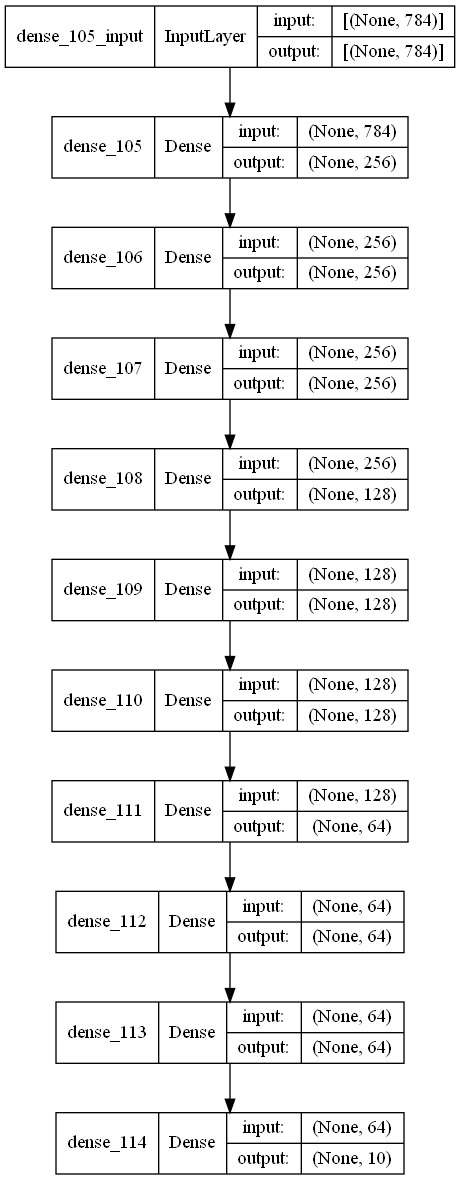

In [ ]:
plot_model(model_x, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model_x.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

model_x.fit(
    train_images,
    to_categorical(train_labels),
    epochs=10,
    batch_size=30,
)

Epoch 1/10
2000/2000 [==============================] - 7s 3ms/step - loss: 9.2675 - accuracy: 0.0996
Epoch 2/10
2000/2000 [==============================] - 6s 3ms/step - loss: 9.7684 - accuracy: 0.0993
Epoch 3/10
2000/2000 [==============================] - 7s 3ms/step - loss: 8.3682 - accuracy: 0.0993
Epoch 4/10
2000/2000 [==============================] - 7s 3ms/step - loss: 8.3682 - accuracy: 0.0993
Epoch 5/10
2000/2000 [==============================] - 7s 3ms/step - loss: 8.3682 - accuracy: 0.0993
Epoch 6/10
2000/2000 [==============================] - 7s 3ms/step - loss: 8.3682 - accuracy: 0.0993
Epoch 7/10
2000/2000 [==============================] - 6s 3ms/step - loss: 8.3682 - accuracy: 0.0993
Epoch 8/10
2000/2000 [==============================] - 7s 3ms/step - loss: 8.3682 - accuracy: 0.0993
Epoch 9/10
2000/2000 [==============================] - 7s 3ms/step - loss: 8.3682 - accuracy: 0.0993
Epoch 10/10
2000/2000 [==============================] - 7s 4ms/step - loss: 8.368

The activation function is **linear**, so:
- the derivative of the function is constant;
- regardless of the number of network layers, it turns our technical network into a one-layer network (the last layer is still a linear function of the first layer);
As a result, we have constant `accuracy` and `loss` in the following eras.


**model_y**

In [ ]:
model_y = Sequential([
    Dense(256, activation='linear', input_shape=(784,)),
    Dense(128, activation='linear'),
    Dense(64, activation='linear'),
    Dense(10, activation='linear'),
])

In [ ]:
print(model_y.summary())

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_115 (Dense)           (None, 256)               200960    
                                                                 
 dense_116 (Dense)           (None, 128)               32896     
                                                                 
 dense_117 (Dense)           (None, 64)                8256      
                                                                 
 dense_118 (Dense)           (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________
None


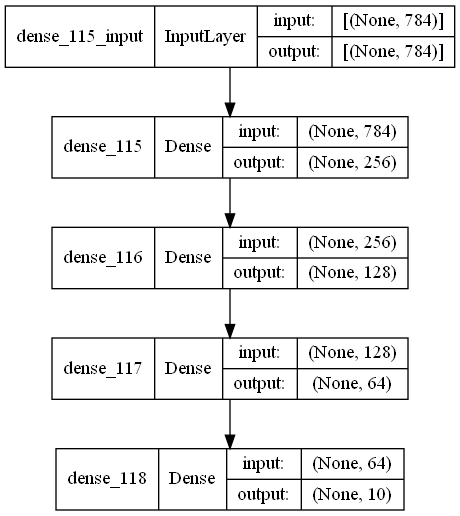

In [ ]:
plot_model(model_y, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model_x.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

model_x.fit(
    train_images,
    to_categorical(train_labels),
    epochs=10,
    batch_size=30,
)

Epoch 1/10
2000/2000 [==============================] - 5s 2ms/step - loss: 8.3682 - accuracy: 0.0993
Epoch 2/10
2000/2000 [==============================] - 4s 2ms/step - loss: 8.3682 - accuracy: 0.0993
Epoch 3/10
2000/2000 [==============================] - 4s 2ms/step - loss: 8.3682 - accuracy: 0.0993
Epoch 4/10
2000/2000 [==============================] - 4s 2ms/step - loss: 8.3682 - accuracy: 0.0993
Epoch 5/10
2000/2000 [==============================] - 4s 2ms/step - loss: 8.3682 - accuracy: 0.0993
Epoch 6/10
2000/2000 [==============================] - 5s 2ms/step - loss: 8.3682 - accuracy: 0.0993
Epoch 7/10
2000/2000 [==============================] - 5s 2ms/step - loss: 8.3682 - accuracy: 0.0993
Epoch 8/10
2000/2000 [==============================] - 5s 2ms/step - loss: 8.3682 - accuracy: 0.0993
Epoch 9/10
2000/2000 [==============================] - 5s 2ms/step - loss: 8.3682 - accuracy: 0.0993
Epoch 10/10
2000/2000 [==============================] - 5s 2ms/step - loss: 8.368

Justification of `accuracy` and `loss` stability analogous to model_x (linear activation function).

Ad. task 5 content

In [ ]:
print(model_x.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 64)               

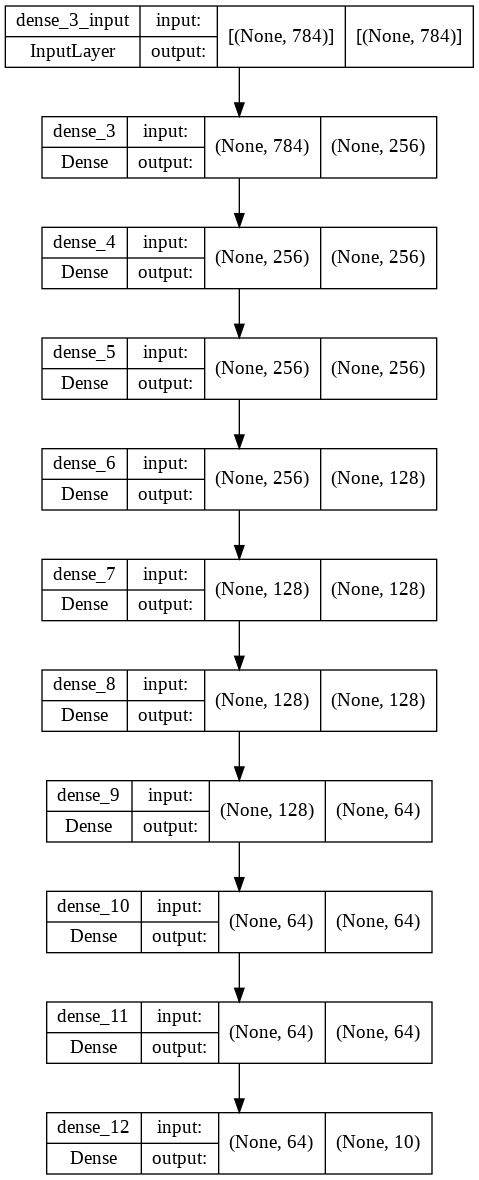

In [ ]:
plot_model(model_x, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
print(model_y.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 256)               200960    
                                                                 
 dense_14 (Dense)            (None, 128)               32896     
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dense_16 (Dense)            (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________
None


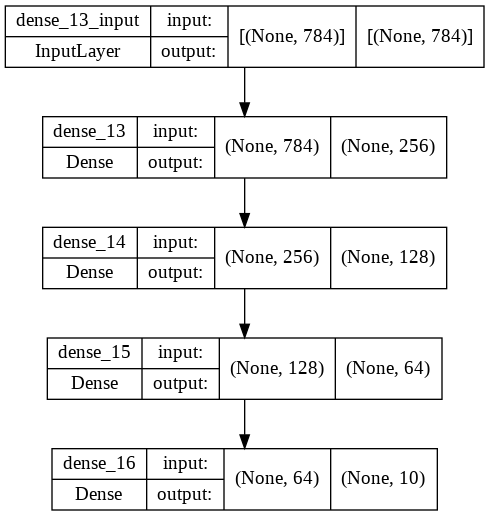

In [ ]:
plot_model(model_y, to_file='model_plot.png', show_shapes=True, show_layer_names=True)